In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<h2>Util</h2>

In [2]:
from sklearn.metrics import *
colormap = {
    0: 'b',
    1: 'r'
}
def printValues(y_pred):
    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred, average='micro')
    pre = precision_score(y_test, y_pred, average='micro')
    
    plotGrafico(y_pred)
        
    print('\033[1mDados\033[0m:\nAccuracy: {}\nRecall: {}\nPrecision: {}\n'.format(acc, rec, pre))
    
def plotGrafico(targetCor):
    c = [colormap[i] for i in targetCor]
    plt.scatter(X_test[:,0], X_test[:,-1], c=c)
    plt.ylim(0,0.2) #ignorar valores altos de Amount para ficar melhor de visualizar o plot
    plt.xlabel('Amount')
    plt.ylabel('Time')
    plt.show()

<h2>Carrega dataset</h2>

In [3]:
df = pd.read_csv("Datasets/creditcard.csv")

In [4]:
#verifica colunas para identificar o Target
list(df)

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

<h2>Normalização</h2>

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [6]:
#verifica-se que os dados não estão normalizados
np.min(df.Amount), np.max(df.Amount), np.min(df.V1), np.max(df.V1), np.min(df.V28), np.max(df.V28)

(0.0,
 25691.16,
 -56.407509631329,
 2.45492999121121,
 -15.430083905534898,
 33.8478078188831)

In [7]:
dfValues = df.get_values()
target = dfValues[:,-1]
data = dfValues[:,:-1]

data = scaler.fit_transform(data)
np.min(data[:,-1]), np.max(data[:,-1]), np.min(data[:,2]), np.max(data[:,2]), np.min(data[:,29]), np.max(data[:,29])

(0.0, 1.0, 0.0, 1.0, 0.0, 1.0)

<h2>Análise dos dados</h2>

<b>Verifica valores únicos da coluna class</b>

In [8]:
np.unique(target)

array([0., 1.])

<b>Faz a contagem</b>

In [9]:
np.count_nonzero(target == 0), np.count_nonzero(target == 1)

(284315, 492)

<b>Separa dados e target</b>

In [10]:
data.shape, target.shape

((284807, 30), (284807,))

<h3>Verifica se o Amount tem relação direta com as fraudes</h3>

In [11]:
fraudes = df[df.Class == 1]
fraudes.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
normal = df[df.Class == 0]
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

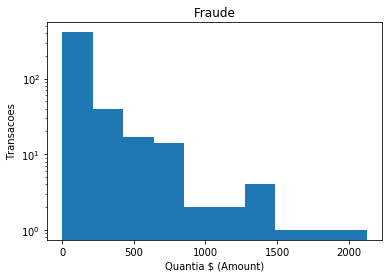

In [13]:
plt.hist(fraudes.Amount)
plt.title('Fraude')
plt.xlabel('Quantia $ (Amount)')
plt.ylabel('Transacoes')
plt.yscale('log')
plt.show();

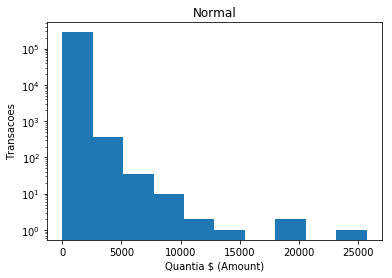

In [14]:
plt.hist(normal.Amount)
plt.title('Normal')
plt.xlabel('Quantia $ (Amount)')
plt.ylabel('Transacoes')
plt.yscale('log')
plt.show();

<b>Apesar das diferenças de quantidade (amount), as fraudes apresentam um histograma semelhante às transações normais</b>

<h3>Verifica se o Tempo junto com o Amount tem relação direta com as fraudes</h3>

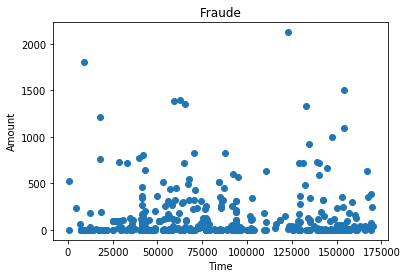

In [15]:
plt.scatter(fraudes.Time, fraudes.Amount)
plt.title('Fraude')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show();

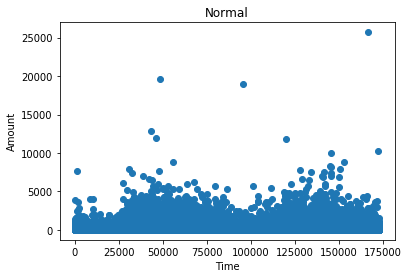

In [16]:
plt.scatter(normal.Time, normal.Amount)
plt.title('Normal')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show();

<h3>Classifica conforme Fraude ou Normal</h3>

In [17]:
#transações normais
dataNormal = data[target == 0,:]
targetNormal = target[target == 0]

#fraudes
dataFraude = data[target == 1,:]
targetFraude = target[target == 1]

#classe 0 = normal, classe 1 = fraude
dataNormal.shape, dataFraude.shape, targetNormal.shape, targetFraude.shape

((284315, 30), (492, 30), (284315,), (492,))

<h2>Balanceamento</h2>

In [18]:
from sklearn.utils import resample

#diminuir o tamanho das amostras ok e aumentar o tamanho das amostras de fraude
#com o tamanho da amostra dividido por 2 (50%)
tamanho = len(df) / 2

dataNormal, targetNormal = resample(dataNormal, targetNormal, n_samples=tamanho)
dataFraude, targetFraude = resample(dataFraude, targetFraude, n_samples=tamanho)

In [19]:
data.shape, target.shape, tamanho, dataNormal.shape, dataFraude.shape, targetNormal.shape, targetFraude.shape

((284807, 30),
 (284807,),
 142403,
 (142403, 30),
 (142403, 30),
 (142403,),
 (142403,))

In [20]:
np.count_nonzero(target == 0), np.count_nonzero(target == 1)

(284315, 492)

In [21]:
np.count_nonzero(targetNormal == 0), np.count_nonzero(targetFraude == 1)

(142403, 142403)

In [22]:
dataConc = np.concatenate((dataNormal,dataFraude))
targetConc = np.concatenate((targetNormal,targetFraude))

np.count_nonzero(targetConc == 0), np.count_nonzero(targetConc == 1), targetConc.shape, dataConc.shape

(142403, 142403, (284806,), (284806, 30))

<h2>Treino x Teste</h2>

<b>Separação de treino e teste</b>

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataConc,targetConc,test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227844, 30), (56962, 30), (227844,), (56962,))

<h2>Feature selection</h2>

<b>Aparentemente não é necessário fazer Feature Selection pois acabou por reduzir apenas uma coluna e não apresenta necessidade de performance neste caso.</b>

In [24]:
from sklearn.feature_selection import *

F, pval = f_classif(X_train, y_train)
ft_columns = np.argwhere(pval <= 0.01).reshape(-1)

ft_train = X_train[:, ft_columns]
ft_test = X_test[:, ft_columns]
ft_train.shape, ft_test.shape

((227844, 29), (56962, 29))

<h3>Plot original</h3>

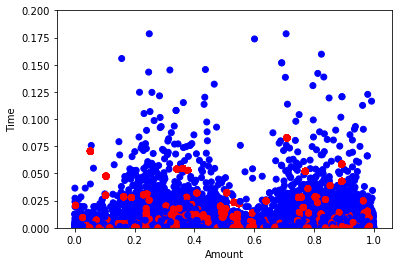

In [25]:
plotGrafico(y_test)

<h2>SVM Linear</h2>

In [26]:
from sklearn.svm import LinearSVC

def linear(xTr, xT):
    ls = LinearSVC(random_state=0, max_iter=15)
    f_it = ls.fit(xTr, y_train)
    y_pred = f_it.predict(xT)
    
    printValues(y_pred)

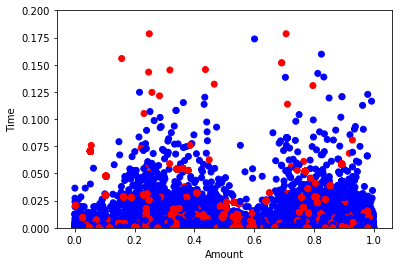

Dados:
Accuracy: 0.942575752256
Recall: 0.942575752256
Precision: 0.942575752256



In [27]:
linear(X_train,X_test)

<h2>SVM Polinomial</h2>

In [28]:
from sklearn.svm import SVC

def poli(xTr, xT):
    svc = SVC(C=3, kernel='poly', degree=3, max_iter=500)
    y_pred = svc.fit(xTr, y_train).predict(xT)
    
    printValues(y_pred)

/usr/local/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


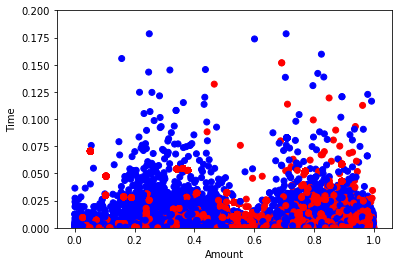

Dados:
Accuracy: 0.848723710544
Recall: 0.848723710544
Precision: 0.848723710544



In [29]:
poli(X_train,X_test)

<h2>SVM RBF</h2>

In [30]:
def rbf(xTr, xT):
    svc = SVC(kernel='rbf', random_state=0, gamma=13, C=8, max_iter=500)
    y_pred = svc.fit(xTr, y_train).predict(xT)
    
    printValues(y_pred)

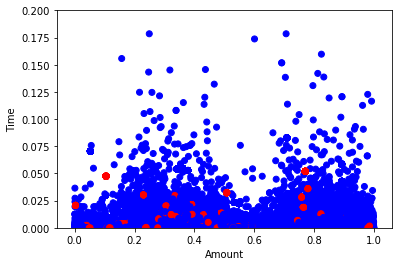

Dados:
Accuracy: 0.662459183315
Recall: 0.662459183315
Precision: 0.662459183315



In [31]:
rbf(X_train,X_test)